In [3]:
library(dplyr)
library(tibble)

# Missing values

In [8]:
PATH <- "https://raw.githubusercontent.com/guru99-edu/R-Programming/master/test.csv"
df_titanic <- read.csv(PATH, sep = ",")

# Return the column names containing missing observations
list_na <- colnames(df_titanic)[ apply(df_titanic, 2, anyNA) ]
list_na

[1] "Age"  "Fare"

## Omite

In [18]:
# Exclude the missing observations
df_titanic_drop <-df_titanic %>%
na.omit()
dim(df_titanic_drop)

[1] 331  11

## mutate

In [5]:
apply(df_titanic, 2, anyNA)

PassengerId      Pclass        Name         Sex         Age       SibSp 
      FALSE       FALSE       FALSE       FALSE        TRUE       FALSE 
      Parch      Ticket        Fare       Cabin    Embarked 
      FALSE       FALSE        TRUE       FALSE       FALSE

In [6]:
# Create mean
average_missing <- apply(df_titanic[,colnames(df_titanic) %in% list_na],
      2,
      mean,
      na.rm =  TRUE)
average_missing

Age     Fare 
30.27259 35.62719

In [9]:
colnames(df_titanic)

[1] "PassengerId" "Pclass"      "Name"        "Sex"         "Age"        
 [6] "SibSp"       "Parch"       "Ticket"      "Fare"        "Cabin"      
[11] "Embarked"

In [11]:
# Create a new variable with the mean and median
df_titanic_replace <- df_titanic %>%
   mutate(replace_mean_age  = ifelse(is.na(Age), average_missing[1], Age),
          replace_mean_fare = ifelse(is.na(Fare), average_missing[2], Fare))

In [12]:
df_titanic_replace

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,replace_mean_age,replace_mean_fare
<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,34.50000,7.8292
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S,47.00000,7.0000
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q,62.00000,9.6875
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S,27.00000,8.6625
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S,22.00000,12.2875
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S,14.00000,9.2250
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,,Q,30.00000,7.6292
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,,S,26.00000,29.0000
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,,C,18.00000,7.2292


In [14]:
apply(df_titanic_replace, 2, anyNA)

PassengerId            Pclass              Name               Sex 
            FALSE             FALSE             FALSE             FALSE 
              Age             SibSp             Parch            Ticket 
             TRUE             FALSE             FALSE             FALSE 
             Fare             Cabin          Embarked  replace_mean_age 
             TRUE             FALSE             FALSE             FALSE 
replace_mean_fare 
            FALSE

In [21]:
# Quick code to replace missing values with the mean
df_titanic_impute_mean <- data.frame(
    sapply(
        df_titanic,
        function(x) ifelse(is.na(x),
            mean(x, na.rm = TRUE),
            x)))

# Correlations

In [13]:
PATH <-"https://raw.githubusercontent.com/guru99-edu/R-Programming/master/british_household.csv"
data <-read.csv(PATH) %>%
  filter(income < 500) %>%
  mutate(log_income = log(income),
         log_totexp = log(totexp),
         children_fac = factor(children, order = TRUE, labels = c("No", "Yes"))) %>%
  select(-c(X, children, totexp, income))
glimpse(data)


Rows: 1,516
Columns: 10
$ wfood        <dbl> 0.4272, 0.3739, 0.1941, 0.4438, 0.3331, 0.3752, 0.2568, …
$ wfuel        <dbl> 0.1342, 0.1686, 0.4056, 0.1258, 0.0824, 0.0481, 0.0909, …
$ wcloth       <dbl> 0.0000, 0.0091, 0.0012, 0.0539, 0.0399, 0.1170, 0.0453, …
$ walc         <dbl> 0.0106, 0.0825, 0.0513, 0.0397, 0.1571, 0.0210, 0.0153, …
$ wtrans       <dbl> 0.1458, 0.1215, 0.2063, 0.0652, 0.2403, 0.0955, 0.0227, …
$ wother       <dbl> 0.2822, 0.2444, 0.1415, 0.2716, 0.1473, 0.3431, 0.5689, …
$ age          <int> 25, 39, 47, 33, 31, 24, 46, 25, 30, 41, 48, 24, 28, 31, …
$ log_income   <dbl> 4.867534, 5.010635, 5.438079, 4.605170, 4.605170, 4.2484…
$ log_totexp   <dbl> 3.912023, 4.499810, 5.192957, 4.382027, 4.499810, 4.2484…
$ children_fac <ord> Yes, Yes, Yes, Yes, No, No, No, No, No, No, Yes, No, Yes…


,wfood,wfuel,wcloth,walc,wtrans,wother,age,log_income,log_totexp,children_fac
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<ord>
1,0.4272,0.1342,0.0000,0.0106,0.1458,0.2822,25,4.867534,3.912023,Yes
2,0.3739,0.1686,0.0091,0.0825,0.1215,0.2444,39,5.010635,4.499810,Yes
3,0.1941,0.4056,0.0012,0.0513,0.2063,0.1415,47,5.438079,5.192957,Yes
4,0.4438,0.1258,0.0539,0.0397,0.0652,0.2716,33,4.605170,4.382027,Yes
5,0.3331,0.0824,0.0399,0.1571,0.2403,0.1473,31,4.605170,4.499810,No
6,0.3752,0.0481,0.1170,0.0210,0.0955,0.3431,24,4.248495,4.248495,No


In [12]:
cor(data$log_income, data$wfood, method = "spearman")

[1] -0.2501252

Bivariable correlations

In [16]:
# the last column of data is a factor level. We don't include it in the code
mat_1 <-as.dist(round(cor(data[,1:9]),2))
mat_1

           wfood wfuel wcloth  walc wtrans wother   age log_income
wfuel       0.11                                                  
wcloth     -0.33 -0.25                                            
walc       -0.12 -0.13  -0.09                                     
wtrans     -0.34 -0.16  -0.19 -0.22                               
wother     -0.35 -0.14  -0.22 -0.12  -0.29                        
age         0.02 -0.05   0.04 -0.14   0.03   0.02                 
log_income -0.25 -0.12   0.10  0.04   0.06   0.13  0.23           
log_totexp -0.50 -0.36   0.34  0.12   0.15   0.15  0.21       0.49

In [15]:
round(cor(data[,1:9]),2)

,wfood,wfuel,wcloth,walc,wtrans,wother,age,log_income,log_totexp
wfood,1.00,0.11,-0.33,-0.12,-0.34,-0.35,0.02,-0.25,-0.50
wfuel,0.11,1.00,-0.25,-0.13,-0.16,-0.14,-0.05,-0.12,-0.36
wcloth,-0.33,-0.25,1.00,-0.09,-0.19,-0.22,0.04,0.10,0.34
walc,-0.12,-0.13,-0.09,1.00,-0.22,-0.12,-0.14,0.04,0.12
wtrans,-0.34,-0.16,-0.19,-0.22,1.00,-0.29,0.03,0.06,0.15
wother,-0.35,-0.14,-0.22,-0.12,-0.29,1.00,0.02,0.13,0.15
age,0.02,-0.05,0.04,-0.14,0.03,0.02,1.00,0.23,0.21
log_income,-0.25,-0.12,0.10,0.04,0.06,0.13,0.23,1.00,0.49
log_totexp,-0.50,-0.36,0.34,0.12,0.15,0.15,0.21,0.49,1.00


In [17]:
install.packages("Hmisc")

Installing package into ‘/home/creyesp/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’




In [19]:
library("Hmisc")
data_rcorr <-as.matrix(data[, 1: 9])

mat_2 <-rcorr(data_rcorr)
mat_2
# mat_2 <-rcorr(as.matrix(data)) returns the same output

           wfood wfuel wcloth  walc wtrans wother   age log_income log_totexp
wfood       1.00  0.11  -0.33 -0.12  -0.34  -0.35  0.02      -0.25      -0.50
wfuel       0.11  1.00  -0.25 -0.13  -0.16  -0.14 -0.05      -0.12      -0.36
wcloth     -0.33 -0.25   1.00 -0.09  -0.19  -0.22  0.04       0.10       0.34
walc       -0.12 -0.13  -0.09  1.00  -0.22  -0.12 -0.14       0.04       0.12
wtrans     -0.34 -0.16  -0.19 -0.22   1.00  -0.29  0.03       0.06       0.15
wother     -0.35 -0.14  -0.22 -0.12  -0.29   1.00  0.02       0.13       0.15
age         0.02 -0.05   0.04 -0.14   0.03   0.02  1.00       0.23       0.21
log_income -0.25 -0.12   0.10  0.04   0.06   0.13  0.23       1.00       0.49
log_totexp -0.50 -0.36   0.34  0.12   0.15   0.15  0.21       0.49       1.00

n= 1516 


P
           wfood  wfuel  wcloth walc   wtrans wother age    log_income
wfood             0.0000 0.0000 0.0000 0.0000 0.0000 0.3647 0.0000    
wfuel      0.0000        0.0000 0.0000 0.0000 0.0000 0.0757 0.00

In [ ]:
p_value <-round(mat_2[["P"]], 3)
p_value

In [32]:
mat_2$P

,wfood,wfuel,wcloth,walc,wtrans,wother,age,log_income,log_totexp
wfood,NA,2.506118e-05,0.000000e+00,1.414858e-06,0.000000e+00,0.000000e+00,3.646961e-01,0.000000e+00,0.000000e+00
wfuel,2.506118e-05,NA,0.000000e+00,3.007291e-07,4.557141e-10,6.394981e-08,7.567424e-02,3.826739e-06,0.000000e+00
wcloth,0.000000e+00,0.000000e+00,NA,5.076751e-04,3.206324e-13,0.000000e+00,1.600887e-01,7.561449e-05,0.000000e+00
walc,1.414858e-06,3.007291e-07,5.076751e-04,NA,0.000000e+00,4.534762e-06,2.438645e-08,1.049204e-01,2.458454e-06
wtrans,0.000000e+00,4.557141e-10,3.206324e-13,0.000000e+00,NA,0.000000e+00,2.587883e-01,2.021741e-02,7.307718e-09
wother,0.000000e+00,6.394981e-08,0.000000e+00,4.534762e-06,0.000000e+00,NA,3.552841e-01,3.343514e-07,4.160975e-09
age,3.646961e-01,7.567424e-02,1.600887e-01,2.438645e-08,2.587883e-01,3.552841e-01,NA,0.000000e+00,4.440892e-16
log_income,0.000000e+00,3.826739e-06,7.561449e-05,1.049204e-01,2.021741e-02,3.343514e-07,0.000000e+00,NA,0.000000e+00
log_totexp,0.000000e+00,0.000000e+00,0.000000e+00,2.458454e-06,7.307718e-09,4.160975e-09,4.440892e-16,0.000000e+00,NA


In [33]:
install.packages("GGally")

Installing package into ‘/home/creyesp/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

also installing the dependencies ‘hms’, ‘progress’, ‘reshape’




Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message in ggcorr(data):
“data in column(s) 'children_fac' are not numeric and were ignored”


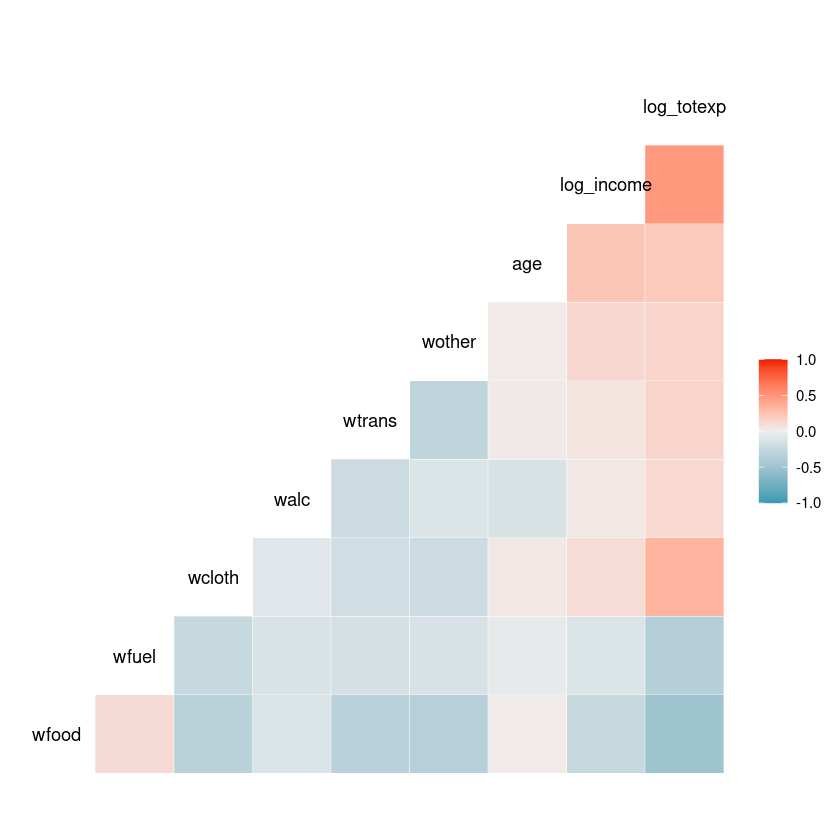

In [34]:
library(GGally)
ggcorr(data)

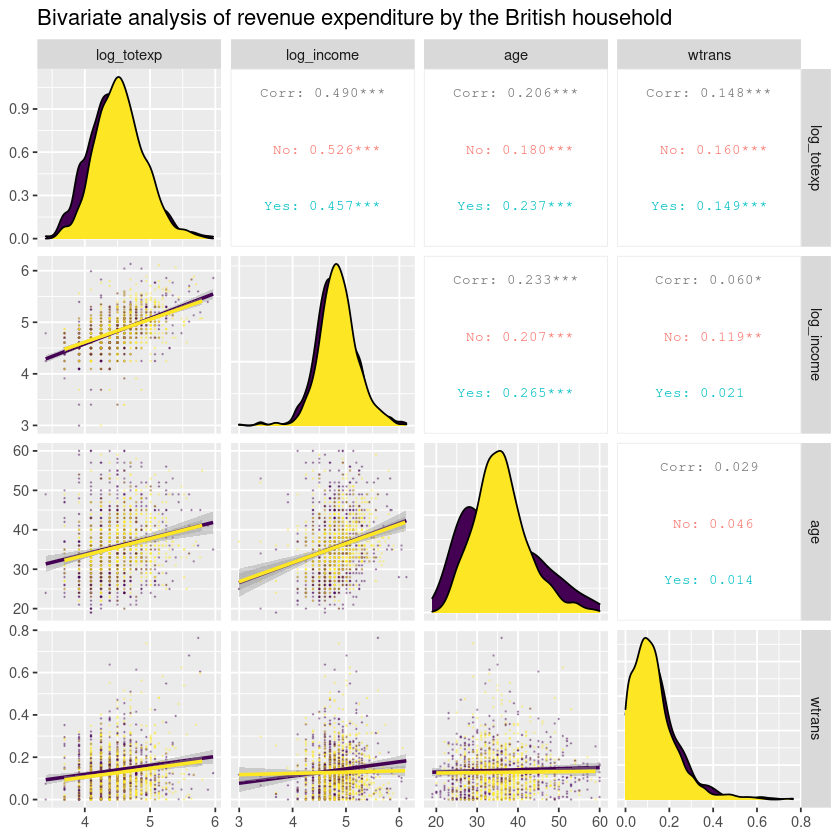

In [35]:
library(ggplot2)
ggpairs(data,
        columns = c("log_totexp", "log_income", "age", "wtrans"),
        title = "Bivariate analysis of revenue expenditure by the British household",
        upper = list(continuous = wrap("cor",size = 3)),
        lower = list(continuous = wrap("smooth", alpha = 0.3, size = 0.1)),
        mapping = aes(color = children_fac))

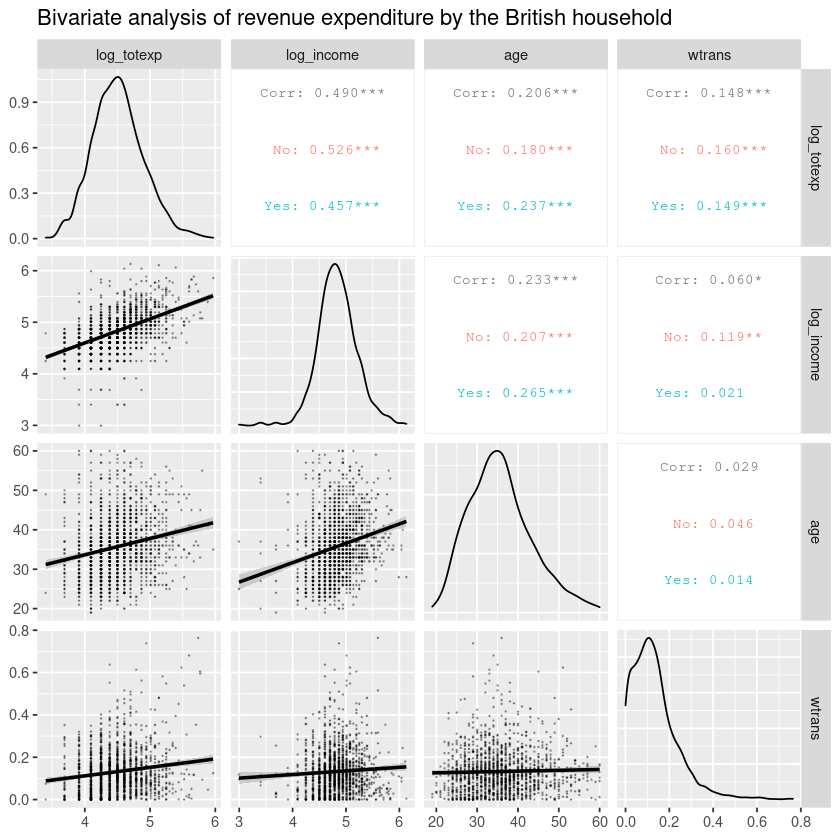

In [37]:
ggpairs(data,
        columns = c("log_totexp", "log_income", "age", "wtrans"),
        title = "Bivariate analysis of revenue expenditure by the British household",
        upper = list(continuous = wrap("cor", size = 3),
        mapping = aes(color = children_fac)),
        lower = list(continuous = wrap("smooth", alpha = 0.3, size = 0.1))
)